In [110]:
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np
import keras
import tensorflow as tf

In [2]:
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
%matplotlib inline
def load_dataset(flatten=False):
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
    # normalize x
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.
    # we reserve the last 10000 training examples for validation
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]
    if flatten:
        X_train = X_train.reshape([X_train.shape[0], -1])
        X_val = X_val.reshape([X_val.shape[0], -1])
        X_test = X_test.reshape([X_test.shape[0], -1])
    return X_train, y_train, X_val, y_val, X_test, y_test

In [3]:
a = [1,2,3,4]

In [190]:
classes = 17

In [84]:
def get_im(path):
    # Load as grayscale
    img = cv2.imread(path, 0)
    return img

In [60]:
# to show image
def show_img(img):
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#     plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

In [426]:
def load_train():
    X_train = []
    y_train = []
    print('Reading train images')
    p = "/root/alpha/git/mine/tensor/dataset/train"
    for j in range(1,classes):
        print('Load folder c{}'.format(j))
        path = os.path.join(p , str(j)+"/*")
        files = glob.glob(path)
        for fl in files:
            img = get_im(fl)
            X_train.append(img)
            y_train.append(j-1)

    return X_train, y_train

In [427]:
def load_test():
    X_train = []
    y_train = []
    print('Reading train images')
    p = "/root/alpha/git/mine/tensor/dataset/test"
    for j in range(1,classes):
        print('Load folder c{}'.format(j))
        path = os.path.join(p , str(j)+"t/*")
        files = glob.glob(path)
        for fl in files:
            img = get_im(fl)
            X_train.append(img)
            y_train.append(j-1)

    return X_train, y_train

In [447]:
x,y = load_train()
tx , ty = load_test()

Reading train images
Load folder c1
Load folder c2
Load folder c3
Load folder c4
Load folder c5
Load folder c6
Load folder c7
Load folder c8
Load folder c9
Load folder c10
Load folder c11
Load folder c12
Load folder c13
Load folder c14
Load folder c15
Load folder c16
Reading train images
Load folder c1
Load folder c2
Load folder c3
Load folder c4
Load folder c5
Load folder c6
Load folder c7
Load folder c8
Load folder c9
Load folder c10
Load folder c11
Load folder c12
Load folder c13
Load folder c14
Load folder c15
Load folder c16


In [448]:
x = np.array(x)
y = np.array(y)
ty = np.array(ty)
tx = np.array(tx)
x = x.astype(float) / 255
tx = tx.astype(float) / 255

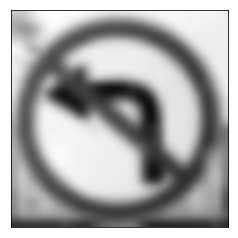

270

In [430]:
show_img(tx[77])
len(x)

In [441]:
x.shape

(270, 30, 30)

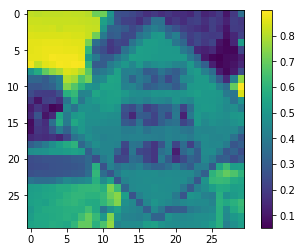

In [310]:
plt.figure()
plt.imshow(tx[50])
plt.colorbar()
plt.grid(False)
plt.show()

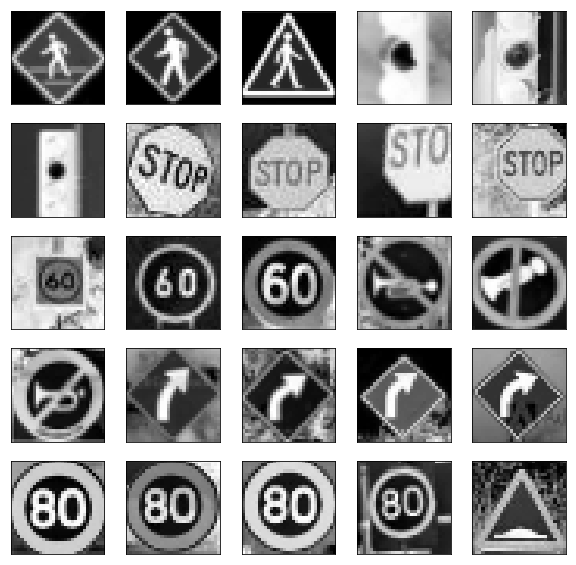

In [431]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[(i+1)*5], cmap=plt.cm.binary)
#     plt.xlabel(class_names[x[i]])
plt.show()

In [449]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,30)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.softmax)
])

In [451]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [452]:
model.fit(x, y, epochs=25)

Epoch 1/25
270/270 [==============================] - 0s 845us/step - loss: 2.8460 - accuracy: 0.0889
Epoch 2/25
270/270 [==============================] - 0s 254us/step - loss: 2.4079 - accuracy: 0.3296
Epoch 3/25
270/270 [==============================] - 0s 246us/step - loss: 1.9992 - accuracy: 0.4037
Epoch 4/25
270/270 [==============================] - 0s 240us/step - loss: 1.7409 - accuracy: 0.5185
Epoch 5/25
270/270 [==============================] - 0s 263us/step - loss: 1.4157 - accuracy: 0.6000
Epoch 6/25
270/270 [==============================] - 0s 239us/step - loss: 1.1766 - accuracy: 0.7185
Epoch 7/25
270/270 [==============================] - 0s 231us/step - loss: 0.9727 - accuracy: 0.7593
Epoch 8/25
270/270 [==============================] - 0s 200us/step - loss: 0.8370 - accuracy: 0.7556
Epoch 9/25
270/270 [==============================] - 0s 239us/step - loss: 0.8399 - accuracy: 0.7852
Epoch 10/25
270/270 [==============================] - 0s 217us/step - loss: 0.666

In [453]:
test_loss, test_acc = model.evaluate(tx, ty)

print('Test accuracy:', test_acc)

80/80 [==============================] - 0s 2ms/step
Test accuracy: 0.7749999761581421


In [392]:
predictions = model.predict(tx)
len(predictions)

80

In [393]:
np.argmax(predictions[49])

9

In [473]:
for i in range(0,80):
    print("{a:2d}".format(a=i)+": "+"{a:2d}".format(a=ty[i])+" >>> "+str(np.argmax(predictions[i])))

 0:  0 >>> 0
 1:  0 >>> 0
 2:  0 >>> 0
 3:  0 >>> 0
 4:  0 >>> 0
 5:  1 >>> 1
 6:  1 >>> 1
 7:  1 >>> 1
 8:  1 >>> 1
 9:  1 >>> 1
10:  2 >>> 2
11:  2 >>> 8
12:  2 >>> 10
13:  2 >>> 2
14:  2 >>> 2
15:  3 >>> 3
16:  3 >>> 3
17:  3 >>> 10
18:  3 >>> 3
19:  3 >>> 3
20:  4 >>> 4
21:  4 >>> 4
22:  4 >>> 4
23:  4 >>> 4
24:  4 >>> 9
25:  5 >>> 5
26:  5 >>> 5
27:  5 >>> 5
28:  5 >>> 5
29:  5 >>> 5
30:  6 >>> 2
31:  6 >>> 6
32:  6 >>> 6
33:  6 >>> 3
34:  6 >>> 3
35:  7 >>> 10
36:  7 >>> 7
37:  7 >>> 2
38:  7 >>> 7
39:  7 >>> 7
40:  8 >>> 8
41:  8 >>> 8
42:  8 >>> 8
43:  8 >>> 8
44:  8 >>> 8
45:  9 >>> 9
46:  9 >>> 9
47:  9 >>> 9
48:  9 >>> 9
49:  9 >>> 9
50: 10 >>> 10
51: 10 >>> 10
52: 10 >>> 10
53: 10 >>> 10
54: 10 >>> 9
55: 11 >>> 13
56: 11 >>> 11
57: 11 >>> 10
58: 11 >>> 14
59: 11 >>> 11
60: 12 >>> 12
61: 12 >>> 12
62: 12 >>> 12
63: 12 >>> 12
64: 12 >>> 12
65: 13 >>> 13
66: 13 >>> 10
67: 13 >>> 2
68: 13 >>> 14
69: 13 >>> 15
70: 14 >>> 10
71: 14 >>> 14
72: 14 >>> 14
73: 14 >>> 14
74: 14 >>> 14